In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/user/Desktop/project/data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.groupby('age')[['charges']].mean()

,charges
age,
18,7086.217556
19,9747.909335
20,10159.697736
21,4730.464330
22,10012.932802
23,12419.820040
24,10648.015962
25,9838.365311
26,6133.825309


In [3]:
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Insurance depending on smoking status.')

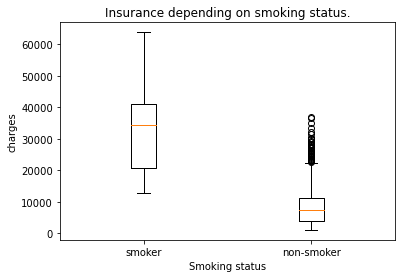

In [5]:
boxplot=plt.figure()
axes1=boxplot.add_subplot(1,1,1)
axes1.boxplot(
    [df[df['smoker']=='yes']['charges'],
      df[df['smoker']=='no']['charges'],],
     labels=['smoker','non-smoker',])

axes1.set_xlabel('Smoking status')
axes1.set_ylabel('charges')
axes1.set_title('Insurance depending on smoking status.')

Text(0.5, 1.0, 'Insurance depending on children.')

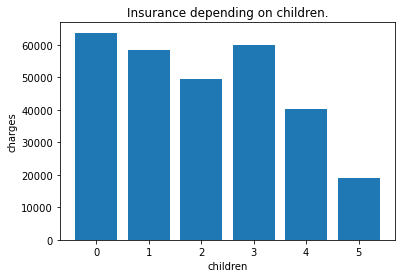

In [6]:
bar=plt.figure()
axes=bar.add_subplot(1,1,1)
axes.bar(df['children'], df['charges'])
axes.set_xlabel('children')
axes.set_ylabel('charges')
axes.set_title('Insurance depending on children.')

In [7]:
def recode_sex(sex):
    if sex == 'female':
        return 1
    else:
        return 0

In [8]:
df['record_sex']=df['sex'].apply(recode_sex)
df['record_sex']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: record_sex, Length: 1338, dtype: int64

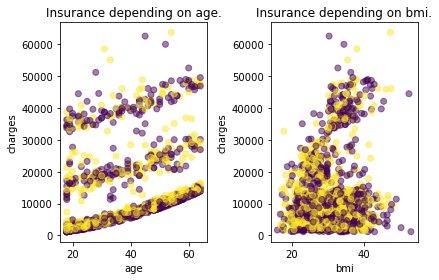

In [9]:
scatter_plot=plt.figure()
axes1=scatter_plot.add_subplot(1,2,1)
axes2=scatter_plot.add_subplot(1,2,2)
axes1.scatter(x=df['age'], y=df['charges'], c=df['record_sex'],alpha=0.5)
axes2.scatter(x=df['bmi'],y=df['charges'],c=df['record_sex'],alpha=0.5)

axes1.set_xlabel('age')
axes1.set_ylabel('charges')
axes1.set_title('Insurance depending on age.')

axes2.set_xlabel('bmi')
axes2.set_ylabel('charges')
axes2.set_title('Insurance depending on bmi.')
scatter_plot.tight_layout()

In [10]:
train_len=list(range(500))
train_df=df.iloc[train_len,:]
train_df

,age,sex,bmi,children,smoker,region,charges,record_sex
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
495,20,male,27.930,0,no,northeast,1967.02270,0
496,31,female,23.600,2,no,southwest,4931.64700,1
497,45,male,28.700,2,no,southwest,8027.96800,0
498,44,female,23.980,2,no,southeast,8211.10020,1


In [11]:
test_len=list(range(500,1338))
test_df=df.iloc[test_len,:]
test_df

,age,sex,bmi,children,smoker,region,charges,record_sex
500,29,male,34.40,0,yes,southwest,36197.6990,0
501,43,male,26.03,0,no,northeast,6837.3687,0
502,51,male,23.21,1,yes,southeast,22218.1149,0
503,19,male,30.25,0,yes,southeast,32548.3405,0
504,38,female,28.93,1,no,southeast,5974.3847,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483,0
1334,18,female,31.92,0,no,northeast,2205.9808,1
1335,18,female,36.85,0,no,southeast,1629.8335,1
1336,21,female,25.80,0,no,southwest,2007.9450,1


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

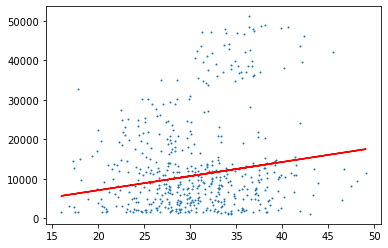

In [13]:
X = np.array(train_df['bmi']).reshape(-1,1)
y = train_df['charges']
lr = LinearRegression()
lr.fit(X, y)

w = lr.coef_[0]

plt.scatter(X, y, s=1)
plt.plot(X, w*X, c='red')

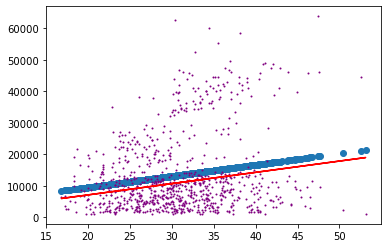

In [14]:
test_X = np.array(test_df['bmi']).reshape(-1,1)
pred_y = lr.predict(test_X)

plt.scatter(test_X, pred_y)
plt.plot(test_X, w*test_X, c='red')

test_y = test_df['charges']

plt.scatter(test_X, test_y, c='purple', s=1)

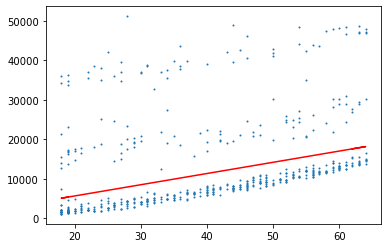

In [15]:
X = np.array(train_df['age']).reshape(-1,1)
y = train_df['charges']
lr = LinearRegression()
lr.fit(X, y)

w = lr.coef_[0]

plt.scatter(X, y, s=1)
plt.plot(X, w*X, c='red')

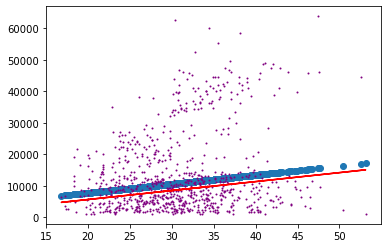

In [16]:
test_X = np.array(test_df['bmi']).reshape(-1,1)
pred_y = lr.predict(test_X)

plt.scatter(test_X, pred_y)
plt.plot(test_X, w*test_X, c='red')

test_y = test_df['charges']

plt.scatter(test_X, test_y, c='purple', s=1)